<a href="https://colab.research.google.com/github/Julian27R/Trabajos/blob/main/Ejercicios_simulaci%C3%B3n_SyS_nov_16-Laplace/Punto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EJERCICIO**

4. Fije los valores de los párametros del sistema rlc paralelo, con condiciones iniciales cero, para simular la respuesta subamortiguada, sobreamortiguada, de amortiguamiento critico, oscilatoria e inestable, ante entrada escalón.


#**SOLUCIÓN**
##Circuito RLC Paralelo:
* Salida ante una entrada Escalon.

In [7]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C, = sym.symbols('t R L C ', positive=True)
#Entrada de interés en Laplace
X = 1/s # Ajustar según tipo de entrada
Hi=control.TransferFunction(1,(L*C)*s**2 + (L*s)/R + 1,s) #Funcion de transferencia con la API de control
#Hlc = H/(1+H) #para lazo cerrado

Y = Hi.num * X /Hi.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

         1          
────────────────────
  ⎛     2   L⋅s    ⎞
s⋅⎜C⋅L⋅s  + ─── + 1⎟
  ⎝          R     ⎠

Para simular la respuesta subamortiguada, sobreamortiguada, de amortiguamiento critico, oscilatoria e inestable, ante entrada escalón. Es necesario encontrar la forma canónica SLIT de segundo orden.

In [2]:
s = sym.symbols('s', complex=True)
t,R, L, C = sym.symbols('t R L C', positive=True, real=True)

#Entrada de interés en Laplace
X = 1/s # X(s) = 1/s resp escalón
K = 1 #ganancia estática
wn = sym.sqrt(1/(C*L)) #frecuencia natural
xi = sym.sqrt(C*L) / (2*R*C) #factor amortiguamiento
H = K*(wn**2/(s**2 + 2*xi*wn*s + wn**2)) #función de transferencia en lazo cerrado slit 2 orden
#Hlc = H/(1+H) #para lazo cerrado
H

         1          
────────────────────
    ⎛ 2    s     1 ⎞
C⋅L⋅⎜s  + ─── + ───⎟
    ⎝     C⋅R   C⋅L⎠

In [3]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

    L⋅(C⋅R⋅s + 1)      1
- ────────────────── + ─
         2             s
  C⋅L⋅R⋅s  + L⋅s + R    

In [4]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

    ⎛  -t      ⎛     ____________⎞     -t      ⎛     ____________⎞⎞    
    ⎜ ─────    ⎜    ╱      2     ⎟    ─────    ⎜    ╱      2     ⎟⎟    
    ⎜ 2⋅C⋅R    ⎜t⋅╲╱  4⋅C⋅R  - L ⎟    2⋅C⋅R    ⎜t⋅╲╱  4⋅C⋅R  - L ⎟⎟    
    ⎜ℯ     ⋅cos⎜─────────────────⎟   ℯ     ⋅sin⎜─────────────────⎟⎟    
    ⎜          ⎝     2⋅C⋅√L⋅R    ⎠             ⎝     2⋅C⋅√L⋅R    ⎠⎟    
- L⋅⎜───────────────────────────── + ─────────────────────────────⎟ + 1
    ⎜              L                             ____________     ⎟    
    ⎜                                           ╱      2          ⎟    
    ⎝                                      √L⋅╲╱  4⋅C⋅R  - L      ⎠    

In [5]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

    ⎛  -t      ⎛     ____________⎞     -t      ⎛     ____________⎞⎞    
    ⎜ ─────    ⎜    ╱      2     ⎟    ─────    ⎜    ╱      2     ⎟⎟    
    ⎜ 2⋅C⋅R    ⎜t⋅╲╱  4⋅C⋅R  - L ⎟    2⋅C⋅R    ⎜t⋅╲╱  4⋅C⋅R  - L ⎟⎟    
    ⎜ℯ     ⋅cos⎜─────────────────⎟   ℯ     ⋅sin⎜─────────────────⎟⎟    
    ⎜          ⎝     2⋅C⋅√L⋅R    ⎠             ⎝     2⋅C⋅√L⋅R    ⎠⎟    
- L⋅⎜───────────────────────────── + ─────────────────────────────⎟ + 1
    ⎜              L                             ____________     ⎟    
    ⎜                                           ╱      2          ⎟    
    ⎝                                      √L⋅╲╱  4⋅C⋅R  - L      ⎠    

#* **Respuesta Subamortiguada**

##0 < $\xi$ < 1

In [21]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 100, L: 0.1, C: 0.01}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

                        -0.5⋅t                            -0.5⋅t              
1 - 0.0158133650950361⋅ℯ      ⋅sin(31.6188235075248⋅t) - ℯ      ⋅cos(31.618823

          
5075248⋅t)

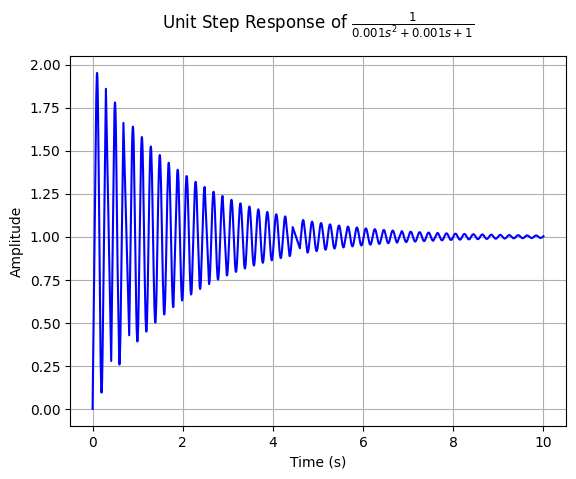

In [22]:
HRLC=control.TransferFunction(Hi.num,Hi.den.subs(RLC),s)
control.step_response_plot(HRLC)

#***Respuesta Sobreamortiguada**
##$\xi$ > 1

In [23]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: 1, C: 10}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

         -t                              
         ───                             
          20    ⎛√39⋅t⎞    -t            
    √39⋅ℯ   ⋅sin⎜─────⎟    ───           
                ⎝  20 ⎠     20    ⎛√39⋅t⎞
1 - ─────────────────── - ℯ   ⋅cos⎜─────⎟
             39                   ⎝  20 ⎠

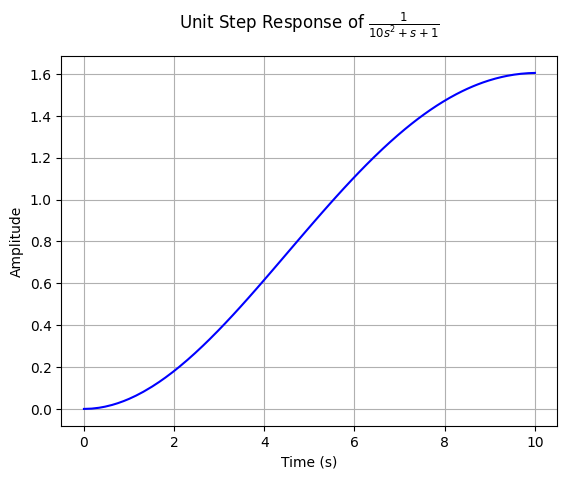

In [24]:
HRLC=control.TransferFunction(Hi.num,Hi.den.subs(RLC),s)
control.step_response_plot(HRLC)

#***Respuesta de Amortiguamiento Critico**
##$\xi$ = 1

In [38]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: 1, C: 4}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

                            -125                 
   -125                √15⋅ℯ    ⋅sin(125⋅√15)    
- ℯ    ⋅cos(125⋅√15) - ────────────────────── + 1
                                 15              

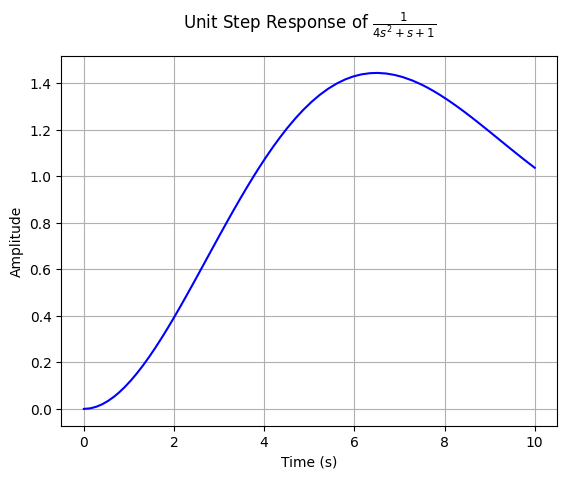

In [39]:
HRLC=control.TransferFunction(Hi.num,Hi.den.subs(RLC),s)
control.step_response_plot(HRLC)

#***Respuesta Oscilatoria**
##$\xi$ = 0

In [48]:
RLC = {R: 17, L: 0, C: 47}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

0

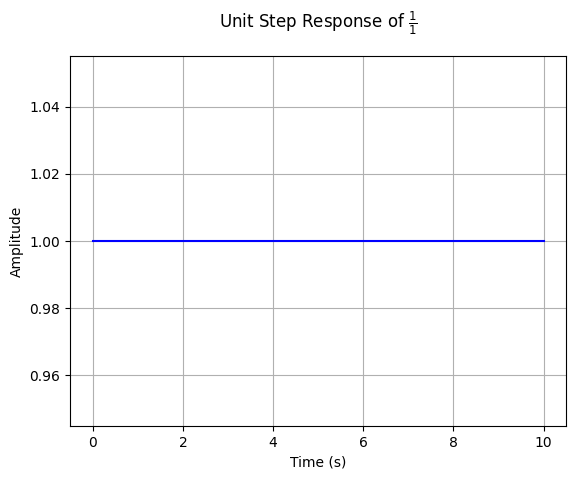

In [47]:
HRLC=control.TransferFunction(Hi.num,Hi.den.subs(RLC),s)
control.step_response_plot(HRLC)

#***Respuesta Inestable**
##$\xi$ < 0

In [49]:
RLC = {R: -1, L: 1, C: 1}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

    500                                   
√3⋅ℯ   ⋅sin(500⋅√3)    500                
─────────────────── - ℯ   ⋅cos(500⋅√3) + 1
         3                                

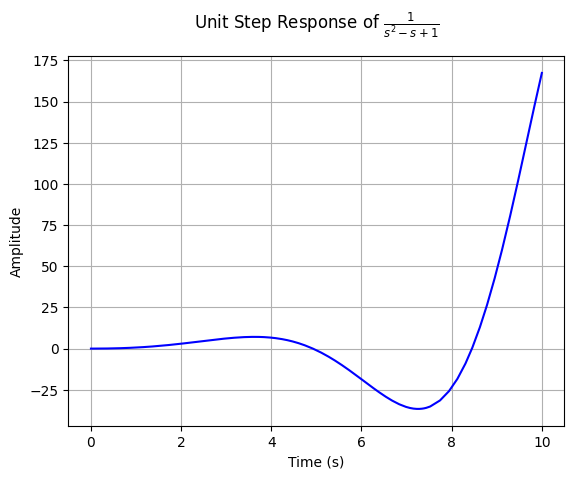

In [50]:
HRLC=control.TransferFunction(Hi.num,Hi.den.subs(RLC),s)
control.step_response_plot(HRLC)